In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import ListedColormap

In [2]:
def create_matrix(S, I, R, N):
    assert np.isclose(S + I + R, 1.0), "S + I + R should equal 1"

    total_population = N * N
    S_count = int(S * N**2)
    I_count = int(I * N**2)
    R_count = int(R * N**2)
    
    flat_array = np.zeros(int(N ** 2))
    flat_array[:S_count] = 0
    flat_array[S_count:S_count+I_count] = 1
    flat_array[S_count+I_count:] = 2

    np.random.shuffle(flat_array)

    matrix = flat_array.reshape(N, N)
    return matrix

In [3]:
matrix = create_matrix(0.99, 0.01, 0.0, 100)
print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Set initial conditions and constants
S = 0.99
I = 0.01
R = 0.0
N = 1000
beta = 0.33
gamma = 0.14
t = 30

matrix = create_matrix(S, I, R, N)

Simulating step 1...
Simulating step 2...
Simulating step 3...
Simulating step 4...
Simulating step 5...
Simulating step 6...
Simulating step 7...
Simulating step 8...
Simulating step 9...
Simulating step 10...
Simulating step 11...
Simulating step 12...
Simulating step 13...
Simulating step 14...
Simulating step 15...
Simulating step 16...
Simulating step 17...
Simulating step 18...
Simulating step 19...
Simulating step 20...
Simulating step 21...
Simulating step 22...
Simulating step 23...
Simulating step 24...
Simulating step 25...
Simulating step 26...
Simulating step 27...
Simulating step 28...
Simulating step 29...
Simulation shape: (30, 1000, 1000)


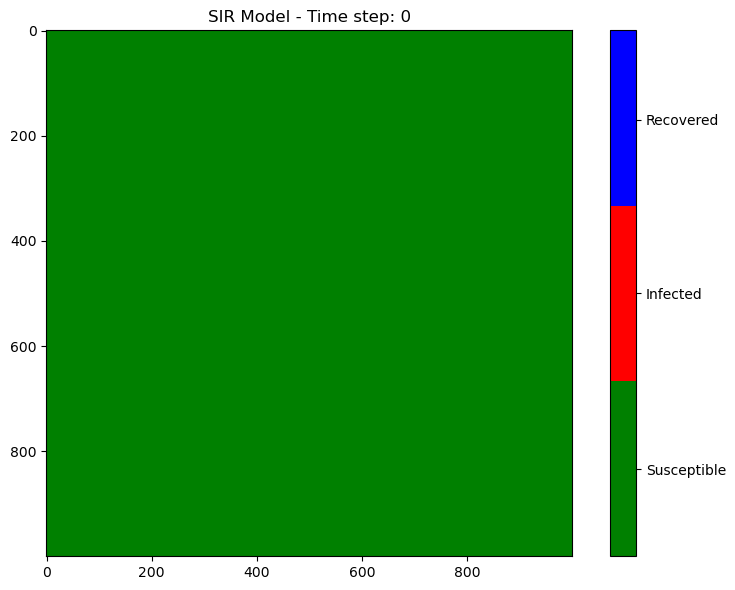

In [ ]:
def check_neighbors(matrix, i, j):
    rows, cols = matrix.shape
    neighbors = []
    
    for x in [i-1, i, i+1]:
        for y in [j-1, j, j+1]:
            if (x != i or y != j) and (0 <= x < rows) and (0 <= y < cols):
                neighbors.append((x, y))
    return neighbors

def SIR_simulate_step(matrix, beta, gamma, rng=np.random):
    rows, cols = matrix.shape
    new_matrix = matrix.copy()
    infection_targets = set()                    # use a set

    # infection phase
    infected_positions = np.argwhere(matrix == 1)  # all (i,j) where infected
    for i, j in infected_positions:
        for x, y in check_neighbors(matrix, i, j):
            if matrix[x, y] == 0 and rng.random() < beta:
                infection_targets.add((x, y))

    for x, y in infection_targets:
        new_matrix[x, y] = 1

    # recovery phase
    for i, j in infected_positions:              # reuse the list
        if rng.random() < gamma:
            new_matrix[i, j] = 2

    return new_matrix



def SIR_simulation(initial_matrix, beta, gamma, steps):
    simulations = [initial_matrix.copy()]
    current_matrix = initial_matrix.copy()
    
    for t in range(1, steps):
        print(f"Simulating step {t}...")
        current_matrix = SIR_simulate_step(current_matrix, beta, gamma)
        simulations.append(current_matrix.copy())
    return np.array(simulations)


def animate_SIR_simulation(simulation):
    print("Simulation shape:", simulation.shape)  # Should be (timesteps, rows, cols)
    
    # Define custom colormap for SIR states
    sir_colors = ['green', 'red', 'blue']  # S, I, R
    cmap = ListedColormap(sir_colors)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Create initial plot
    im = ax.imshow(simulation[0], cmap=cmap, vmin=0, vmax=2)
    
    # Add colorbar with state labels
    cbar = plt.colorbar(im, ticks=[0.33, 1.0, 1.66])
    cbar.ax.set_yticklabels(['Susceptible', 'Infected', 'Recovered'])
    
    # Set title
    ax.set_title('SIR Model Simulation')
    
    def update(t):
        """Update the plot for each frame."""
        im.set_data(simulation[t])
        ax.set_title(f'SIR Model - Time step: {t}')
        return [im]
    
    # Create animation
    timesteps = simulation.shape[0]
    ani = FuncAnimation(fig, update, frames=timesteps, interval=100, blit=True)
    
    plt.tight_layout()
    plt.show()
    
    return ani

simulations = SIR_simulation(matrix, beta, gamma, t)

ani = animate_SIR_simulation(simulations)
ani.save("sir_sim.gif", writer='pillow', fps=2)


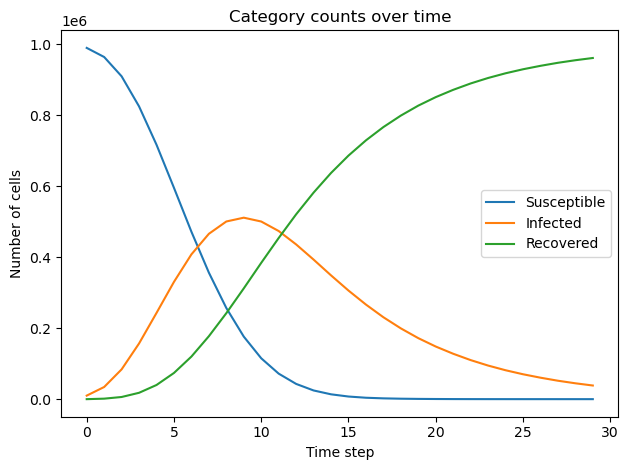

In [11]:
#sanity check for the spatial sim
# ----------- count categories over time ---------------
S_count = (simulations == 0).sum(axis=(1,2))
I_count = (simulations == 1).sum(axis=(1,2))
R_count = (simulations == 2).sum(axis=(1,2))

# ------------- plot time series -----------------------
plt.figure()
plt.plot(S_count, label="Susceptible")
plt.plot(I_count, label="Infected")
plt.plot(R_count, label="Recovered")
plt.xlabel("Time step")
plt.ylabel("Number of cells")
plt.title("Category counts over time")
plt.legend()
plt.tight_layout()
plt.show()

Speed up version test

Simulating step 1...
Simulating step 2...
Simulating step 3...
Simulating step 4...
Simulating step 5...
Simulating step 6...
Simulating step 7...
Simulating step 8...
Simulating step 9...
Simulating step 10...
Simulating step 11...
Simulating step 12...
Simulating step 13...
Simulating step 14...
Simulating step 15...
Simulating step 16...
Simulating step 17...
Simulating step 18...
Simulating step 19...
Simulating step 20...
Simulating step 21...
Simulating step 22...
Simulating step 23...
Simulating step 24...
Simulating step 25...
Simulating step 26...
Simulating step 27...
Simulating step 28...
Simulating step 29...
Simulation shape: (30, 1000, 1000)


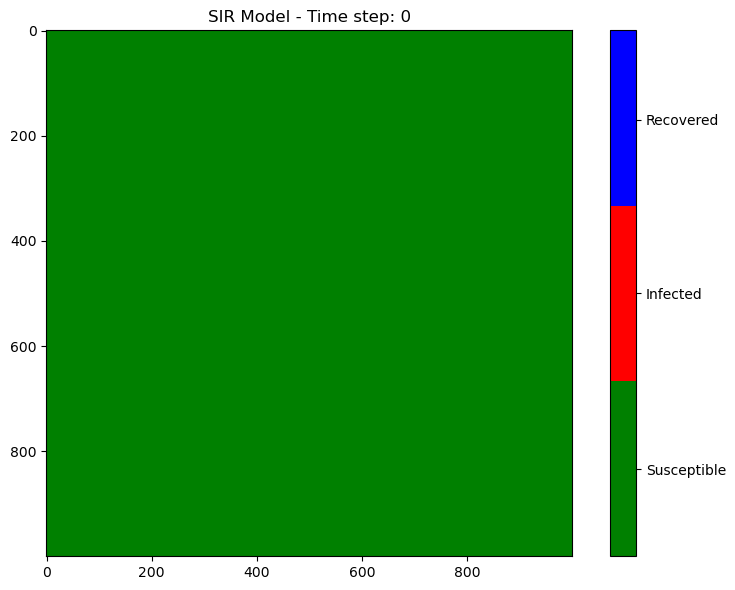

In [ ]:
import numpy as np

# ------------------------------------------------------------
# one stochastic S I R V B trajectory (no births / deaths)
# ------------------------------------------------------------
def simulate_sirvb(S0, I0, R0, V0,
                   beta, gamma,       # infection & recovery parameters
                   v_rate, b_rate,    # ν(t)  ,  b(t)
                   N, T, rng=np.random):
    S = np.zeros(T+1, dtype=int)
    I = np.zeros_like(S)
    R = np.zeros_like(S)
    V = np.zeros_like(S)

    S[0], I[0], R[0], V[0] = S0, I0, R0, V0

    for t in range(T):
        # ---------- event probabilities for one time-step ----------
        p_inf  = 1 - np.exp(-beta  * I[t] / N)   # S  -> I
        p_rec  = 1 - np.exp(-gamma)              # I  -> R (pre-breakthrough)
        p_vacc = 1 - np.exp(-v_rate)             # S  -> V (pre-breakthrough)

        # ---------- Binomial draws ---------------------------------
        new_inf  = rng.binomial(S[t], p_inf)
        new_rec  = rng.binomial(I[t], p_rec)
        new_vacc = rng.binomial(S[t] - new_inf, p_vacc)

        # ---------- breakthrough: part of new R & V return to S ----
        back_R = rng.binomial(new_rec,  b_rate)
        back_V = rng.binomial(new_vacc, b_rate)

        # effective gains to immunity
        R_gain = new_rec  - back_R
        V_gain = new_vacc - back_V

        # ---------- state updates ----------------------------------
        S[t+1] = S[t] - new_inf - new_vacc + back_R + back_V
        I[t+1] = I[t] + new_inf - new_rec
        R[t+1] = R[t] + R_gain
        V[t+1] = V[t] + V_gain

    return S, I, R, V

# -------- helper: Moore neighbours ------------------------------------------
def neighbours(mat, i, j):
    rows, cols = mat.shape
    for x in (i-1, i, i+1):
        for y in (j-1, j, j+1):
            if (x, y) != (i, j) and 0 <= x < rows and 0 <= y < cols:
                yield x, y

# -------- one synchronous update --------------------------------------------
def step_SIRVB(mat, beta, beta_v, gamma, mu,
               nu,          # S -> V   (vaccination rate per step)
               omega_r,     # R -> S   (waning natural immunity)
               omega_v,     # V -> S   (waning vacc. immunity)
               rng=np.random):

    rows, cols = mat.shape
    new_mat = mat.copy()

    # --- 1. INFECT phase -----------------------------------------------------
    inf_S, inf_V = set(), set()

    infected_pos = np.argwhere(mat == 1)
    for i, j in infected_pos:
        for x, y in neighbours(mat, i, j):
            if mat[x, y] == 0 and rng.random() < beta:        # S -> I
                inf_S.add((x, y))
            elif mat[x, y] == 3 and rng.random() < beta_v:    # V -> I  (break-through)
                inf_V.add((x, y))

    for x, y in inf_S | inf_V:
        new_mat[x, y] = 1

    # --- 2. PROGRESSION phase -----------------------------------------------
    # 2a. Infected either recover or die
    for i, j in infected_pos:
        u = rng.random()
        if u < mu:                   # death
            new_mat[i, j] = 4
        elif u < mu + gamma:         # recovery
            new_mat[i, j] = 2
        # else remain infected

    # 2b. Vaccinate susceptibles
    susc_pos = np.argwhere(mat == 0)
    for i, j in susc_pos:
        if rng.random() < nu:
            new_mat[i, j] = 3

    # 2c. Immunity waning (R -> S, V -> S)
    rec_pos = np.argwhere(mat == 2)
    for i, j in rec_pos:
        if rng.random() < omega_r:
            new_mat[i, j] = 0
    vacc_pos = np.argwhere(mat == 3)
    for i, j in vacc_pos:
        if rng.random() < omega_v:
            new_mat[i, j] = 0

    return new_mat

simulations = [initial_grid.copy()]
current = initial_grid.copy()

for t in range(1, steps):
    current = step_SIRVB(current, beta, beta_v, gamma, mu,
                         nu, omega_r, omega_v)
    simulations.append(current.copy())
simulations = np.array(simulations)